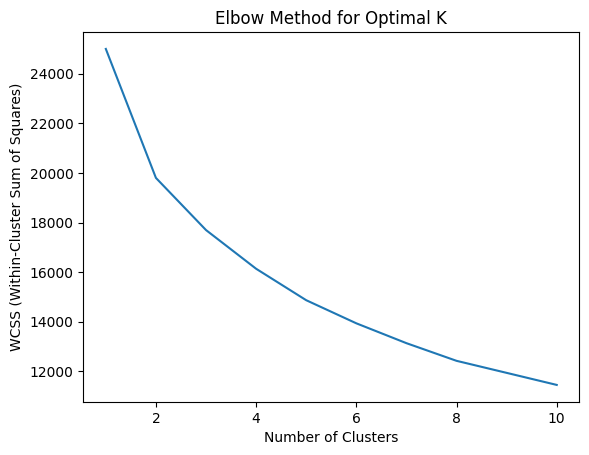

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population  Cluster  
0                          4.09      23086.80050        0  
1                          3.09      40173.07217        3  
2                          5.13      36882.15940        2  
3                          3.26      34310.24283        0  
4                          4.23      26354.10947        2  


In [1]:
#Question-1
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/USA_Housing (1).csv")
df = df.iloc[:, :-1]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()

optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

print(df.head())


In [2]:
!pip install scikit-learn-extra



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.9 MB/s eta 0:00:00


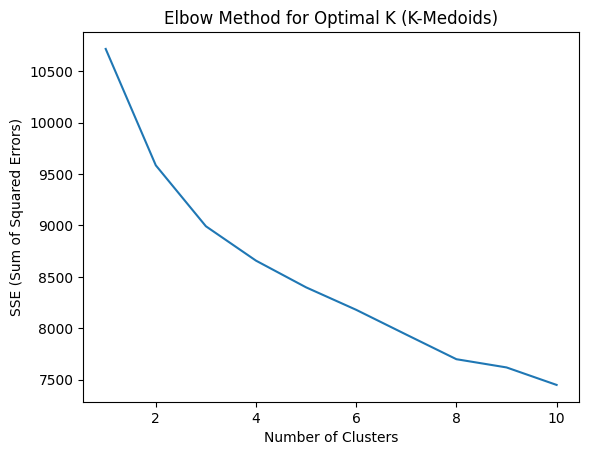

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population  Cluster  
0                          4.09      23086.80050        3  
1                          3.09      40173.07217        1  
2                          5.13      36882.15940        0  
3                          3.26      34310.24283        2  
4                          4.23      26354.10947        0  


In [4]:
#Question-2
import pandas as pd
import numpy as np
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/USA_Housing (1).csv")
df = df.iloc[:, :-1]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

sse = []
for k in range(1, 11):
    kmedoids = KMedoids(n_clusters=k, init='k-medoids++', random_state=42)
    kmedoids.fit(data_scaled)
    sse.append(kmedoids.inertia_)

plt.plot(range(1, 11), sse)
plt.title("Elbow Method for Optimal K (K-Medoids)")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.show()

optimal_clusters = 4  # Adjust this value based on the Elbow plot
kmedoids = KMedoids(n_clusters=optimal_clusters, init='k-medoids++', random_state=42)
df['Cluster'] = kmedoids.fit_predict(data_scaled)

print(df.head())
